# Building and training a single-layer neural network with keras

Keras is a high-level Python interface for building and training neural networks. 

It can use Tensorflow or Theano as backend, so as to make efficient use of the CPU and (if available) GPU.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Keras imports
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

## Defining the model with keras

Keras describes a neural network by a set of `Dense` layers (which contain the weights) and `Activation` layers (which contain the non-linear functions).

![keras layers](./images/keras_layers.png)

In the case of our simple single-layer network, the API for building the network is the following.

In [4]:
# Build the model with keras
model = Sequential()
model.add( Dense( input_dim=2, units=1 ) )
model.add( Activation( 'sigmoid' ) )

In [5]:
# Print the summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# Training the network

Again, we will load the training data.

In [8]:
# Load data
df = pd.read_csv('./data/setosa/train.csv')
X = df[['petal length (cm)', 'petal width (cm)']].values
y = df['setosa'].values

and define a function to look at the predictions of the model (which for the moment is untrained).

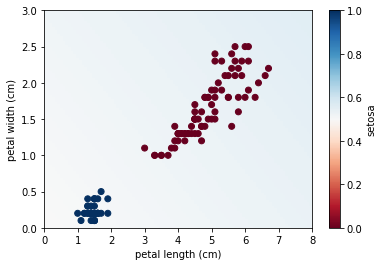

In [9]:
def plot_keras_model():
    "Plot the results of the model, along with the data points"
    # Calculate the probability on a mesh
    petal_width_mesh, petal_length_mesh = \
        np.meshgrid( np.linspace(0,3,100), np.linspace(0,8,100) )
    petal_width_mesh = petal_width_mesh.flatten()
    petal_length_mesh = petal_length_mesh.flatten()
    p = model.predict( np.stack( (petal_length_mesh, petal_width_mesh), axis=1 ) )
    p = p.reshape((100,100))
    # Plot the probability on the mesh
    plt.clf()
    plt.imshow( p.T, extent=[0,8,0,3], origin='lower', 
               vmin=0, vmax=1, cmap='RdBu', aspect='auto', alpha=0.7 )
    # Plot the data points
    plt.scatter( df['petal length (cm)'], df['petal width (cm)'], c=df['setosa'], cmap='RdBu')
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    cb = plt.colorbar()
    cb.set_label('setosa')
plot_keras_model()

Keras will then automatically adjust the weights by trying to minimize a given **loss function**.

When the network output is a probability, a good loss function is the binary cross-entropy:

$ L(p_{setosa}) = - y\log(p_{setosa}) - (1-y) \log(1-p_{setosa}) $

In [10]:
# Prepare the model for training
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [11]:
# Train the network
model.fit( X, y, batch_size=16, epochs=20, verbose=1 )

Epoch 1/20
120/120 [==============================] - 0s 2ms/step - loss: 0.5153 - acc: 0.6083
Epoch 2/20
120/120 [==============================] - 0s 89us/step - loss: 0.4237 - acc: 0.6583
Epoch 3/20
120/120 [==============================] - 0s 300us/step - loss: 0.4054 - acc: 0.6583
Epoch 4/20
120/120 [==============================] - 0s 266us/step - loss: 0.3832 - acc: 0.6583
Epoch 5/20
120/120 [==============================] - 0s 443us/step - loss: 0.3677 - acc: 0.6583
Epoch 6/20
120/120 [==============================] - 0s 139us/step - loss: 0.3525 - acc: 0.6583
Epoch 7/20
120/120 [==============================] - ETA: 0s - loss: 0.3238 - acc: 0.687 - 0s 183us/step - loss: 0.3374 - acc: 0.6750
Epoch 8/20
120/120 [==============================] - 0s 236us/step - loss: 0.3244 - acc: 0.7167
Epoch 9/20
120/120 [==============================] - 0s 179us/step - loss: 0.3098 - acc: 0.7833
Epoch 10/20
120/120 [==============================] - 0s 208us/step - loss: 0.2982 - acc: 0

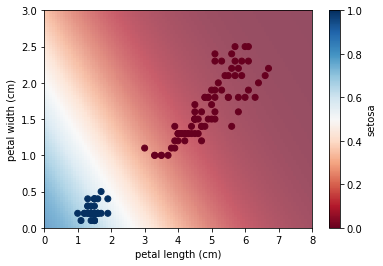

In [12]:
plot_keras_model()

### What just happened?

Just like we did by hand, keras tried to find the **best set of weights** for the network.

In order to do so, Keras divided the dataset into **batches** of 16 examples (16 specimens of iris at a time). 
For each batch, it computed how the weights should be changed in order to **make the loss function lower**, and correspondingly ajusted them by a small amount (which is proportional to the learning rate `lr`).

The process of going through the whole dataset (batch by batch) is called an **epoch**. The network needs to "see" the dataset several times (i.e. it needs several epochs) in order to find the right weights.

### A few remarks on training

**The training depends on a number of parameters, that have to be "skillfully" chosen by the user:**
- loss function
- optimizer and learning rate
- batch size
- number of epochs

A "bad" choice may result in the network training more slowly, or not properly training at all.

**The training is stochastic.**
This is because:
- The initial values of the weights are chosen randomly.
- The way the data is divided into batch is random.

## Performing predictions on the test sets

The optimal weights are stored in the `model` object. As before, we can thus use them to make new predictions on the test dataset.

In [13]:
df_test = pd.read_csv('./data/setosa/test.csv')
df_test.head(10)

,petal length (cm),petal width (cm),setosa
0,4.2,1.5,0
1,5.6,2.1,0
2,1.5,0.2,1
3,4.9,2.0,0
4,4.9,1.5,0
5,6.7,2.0,0
6,5.0,2.0,0
7,5.2,2.3,0
8,4.4,1.4,0
9,1.3,0.2,1


In [14]:
model.predict( np.array([[4.2, 1.5]]) )

array([[ 0.09408786]], dtype=float32)

In [15]:
df_test['probability_setosa_predicted'] = model.predict( df_test[['petal length (cm)', 'petal width (cm)']].values )

In [16]:
df_test

,petal length (cm),petal width (cm),setosa,probability_setosa_predicted
0,4.2,1.5,0,0.094088
1,5.6,2.1,0,0.024890
2,1.5,0.2,1,0.636916
3,4.9,2.0,0,0.041699
4,4.9,1.5,0,0.062153
5,6.7,2.0,0,0.013520
6,5.0,2.0,0,0.039208
7,5.2,2.3,0,0.027129
8,4.4,1.4,0,0.090385
9,1.3,0.2,1,0.666049


## Next steps

Let us know look at how to train a network with multiple layers [here](./Multi_layer_keras.ipynb).